# Titanic: Machine Learning from Disaster
<img src="titanic.jpg"
     alt="Titanic"
     style="float: left; margin-right: 10px;" />


## Importing Required Modules:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
sb.set()

## Importing Data:

In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")
print(test_data.shape)
print(train_data.shape)

(418, 11)
(891, 12)


## Checking How Many Null and Non-Null in Every Column

In [3]:
print(test_data.info())
print(train_data.info()) #To find how many NaN values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null f

### Concatenating train and test data to create a dataset to perform data cleaning and feature Engineering:

In [4]:
dataset = pd.concat([train_data, test_data], sort = False, ignore_index = True)
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Using SimpleImputer from sklearn to imput NaN Values:

In [5]:
Age = pd.DataFrame(dataset['Age'])
imp = SimpleImputer(strategy="median")
Age = imp.fit_transform(Age)
dataset["Age"]= Age

In [6]:
embarked = pd.DataFrame(dataset['Embarked'])
imp = SimpleImputer(strategy="most_frequent")
embarked = imp.fit_transform(embarked)
dataset["Embarked"]= embarked

In [7]:
fare = pd.DataFrame(dataset['Fare'])
imp = SimpleImputer(strategy="median")
fare = imp.fit_transform(fare)
dataset["Fare"]= fare
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## To Replace Cabin Name with the First Letter as it represents the position of the Cabin(On Which Deck):

In [8]:
for i in range (len(dataset["Cabin"])):
    j = dataset["Cabin"].iloc[i]
    if j == j: #NaN != NaN
        dataset["Cabin"].iloc[i] = j[0]
    else:
        dataset["Cabin"].iloc[i]= "U"
dataset.head()
        

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


In [9]:
dataset["Sex"] = np.where(dataset["Sex"] == "male", 1,0) #1 if its male, 0 if its female
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


In [10]:
train = dataset[:len(train_data)]
test = dataset[len(train_data):]


## Visualize Variables to Understand the Relationships between different Features:

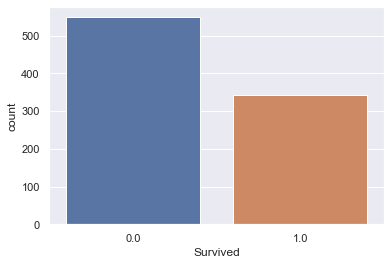

In [11]:
import seaborn as sb
sb.countplot(train['Survived'])

### Females have a higher survival rate:

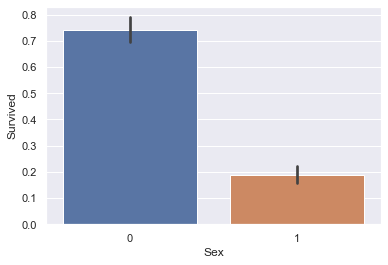

In [12]:
sb.barplot(x="Sex",y="Survived",data=train)

### Higher Class means Higher Survival Rate:

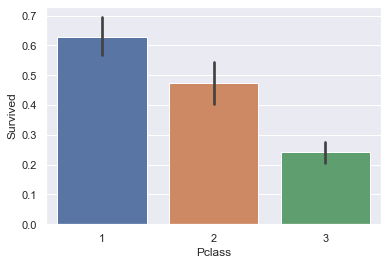

In [13]:
sb.barplot(x="Pclass",y="Survived",data=train)

### Number of Siblings/Spouses is not a great indicator:

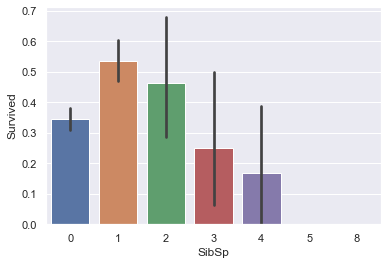

In [14]:
sb.barplot(x="SibSp",y="Survived",data=train)

### We Observe that Number of Parents/Children,Age is not a great indicator:

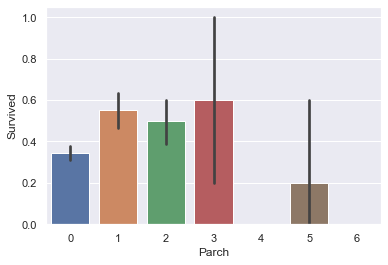

In [15]:
sb.barplot(x="Parch",y="Survived",data=train)

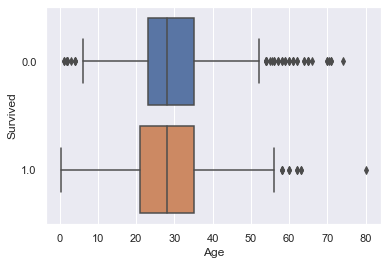

In [16]:
sb.boxplot(x = "Age", y = "Survived", data = train, orient = "h")

### Fare has some differentiation in Survival Rate:

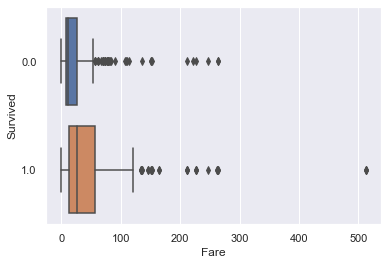

In [17]:
sb.boxplot(x = "Fare", y = "Survived", data = train, orient = "h")

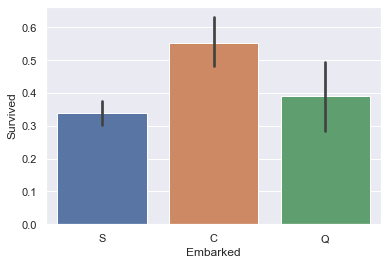

In [18]:
sb.barplot(x="Embarked",y="Survived",data=train)

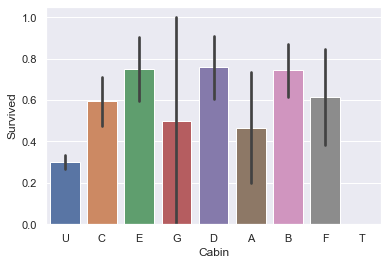

In [19]:
sb.barplot(x="Cabin",y="Survived",data=train)

In [20]:
dataset= dataset.drop(columns = ['Name', 'Ticket', 'PassengerId']) #Removing Irrelevant Features

### Creating a new Feature called Family Size:

In [21]:
dataset["family_size"]= dataset['SibSp']+ dataset['Parch'] + 1 


In [22]:
dataset = dataset.drop(columns = ['SibSp', "Parch"])

In [23]:
dataset

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_size
0,0.0,3,1,22.0,7.2500,U,S,2
1,1.0,1,0,38.0,71.2833,C,C,2
2,1.0,3,0,26.0,7.9250,U,S,1
3,1.0,1,0,35.0,53.1000,C,S,2
4,0.0,3,1,35.0,8.0500,U,S,1
...,...,...,...,...,...,...,...,...
1304,NaN,3,1,28.0,8.0500,U,S,1
1305,NaN,1,0,39.0,108.9000,C,C,1
1306,NaN,3,1,38.5,7.2500,U,S,1
1307,NaN,3,1,28.0,8.0500,U,S,1


In [24]:
#Encoding Categorical Variables into integers instead of alphabets
label = LabelEncoder()

for col in [ 'Embarked', 'Cabin']:
    dataset[col] = label.fit_transform(dataset[col])

## Modeling:

In [25]:
train = dataset[:len(train_data)]
test = dataset[len(train_data):]
train.Survived = train.Survived.astype(int)
train.Sruvived = train.Survived.astype('category')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [26]:
y = train.Survived
X = train.drop('Survived', axis=1)

## Using KFold-Cross-Validation to find the best Learning Algrothm:

In [27]:
# Logistic Regression
print("Logistic Regression:", cross_val_score(LogisticRegression(), X, y).mean())

# SVC
print("SVC:", cross_val_score(SVC(), X, y).mean())

# Random Forest
print("Random Forest:", cross_val_score(RandomForestClassifier(), X, y).mean())

# GaussianNB
print("GaussianNB:", cross_val_score(GaussianNB(), X, y).mean())

# Decision Tree
print("Decision Tree:", cross_val_score(DecisionTreeClassifier(), X, y).mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will ch

Logistic Regression: 0.7968574635241302
SVC: 0.6846240179573512
Random Forest: 0.8114478114478114
GaussianNB: 0.7631874298540966
Decision Tree: 0.7744107744107745


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


### Creating a simple Model First:

In [28]:
# # Define the model. Set random_state to 1
# rf_model = RandomForestClassifier(random_state=1)

# # fit your model
# rf_model.fit(X, y)

In [29]:
test = test.drop(columns = ['Survived'])
# test_prd = rf_model.predict(test)
# test_prd

### Creating A Better Model:

In [30]:
final_model = RandomForestClassifier(random_state = 1, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
final_model.fit(X,y)
test_prd2 = final_model.predict(test)
test_prd2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### Create a Submission:

In [31]:
submission = pd.DataFrame(columns=['PassengerId','Survived'])
submission['PassengerId'] = test_data['PassengerId']
submission['Survived'] = test_prd2

In [32]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [33]:
submission.to_csv('Submission2.csv',index=False)

## We got an Accuracy of 78.229% With the above Methods.